In [1]:
import json
import arrow
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
df = pd.read_json("data.json")
df.head()

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
0,AKX_20240505_20250130_25-30_M_EUR,965482,801270,47633,499998,"{""username"": ""uwalker"", ""name"": ""Tanya Gray"", ..."
1,KTR_20240425_20260318_30-50_M_GBP,480386,363936,79887,499999,"{""username"": ""uwalker"", ""name"": ""Tanya Gray"", ..."
2,AKX_20221225_20240219_20-35_F_USD,161578,118809,65196,500000,"{""username"": ""uwalker"", ""name"": ""Tanya Gray"", ..."
3,AKX_20221222_20241111_20-30_B_EUR,23646,13083,45014,499997,"{""username"": ""tyrone78"", ""name"": ""Michael Dods..."
4,AKX_20230525_20240819_45-50_B_USD,938501,603915,61271,499998,"{""username"": ""tyrone78"", ""name"": ""Michael Dods..."


In [3]:
df.count()

cmp_name      5026
cmp_bgt       5026
cmp_spent     5026
cmp_clicks    5026
cmp_impr      5026
user          5026
dtype: int64

In [4]:
df.describe()

,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr
count,5026.000000,5026.000000,5026.000000,5026.000000
mean,507300.831874,252932.650020,39804.010545,499999.527656
std,292664.108620,225098.064465,21859.283498,2.048499
min,1031.000000,115.000000,335.000000,499992.000000
25%,253623.750000,66728.750000,22223.000000,499998.000000
50%,513977.500000,185197.500000,36436.000000,500000.000000
75%,766298.750000,391207.000000,55364.250000,500001.000000
max,999673.000000,988065.000000,98987.000000,500007.000000


In [5]:
df.sort_values(by=['cmp_bgt'], ascending=False).head(3)

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
1690,GRZ_20240814_20241130_25-30_F_EUR,999673,25094,43395,499997,"{""username"": ""scarter"", ""name"": ""Katherine Mor..."
2824,KTR_20230411_20230906_45-70_F_GBP,999550,433117,88607,500001,"{""username"": ""usherman"", ""name"": ""Jamie Chavez..."
4382,GRZ_20240426_20240814_40-60_B_EUR,999492,956634,40675,500003,"{""username"": ""jrivera"", ""name"": ""Brandon Mulli..."


In [6]:
df.sort_values(by=['cmp_bgt'], ascending=False).tail(3)

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
4825,AKX_20221030_20221220_25-40_F_EUR,1433,549,35554,500000,"{""username"": ""conniegonzales"", ""name"": ""Christ..."
5015,AKX_20240615_20251009_45-70_F_EUR,1303,205,88723,500005,"{""username"": ""abrown"", ""name"": ""Stacey Davis"",..."
1946,BYU_20230807_20240727_30-40_B_USD,1031,276,27189,500002,"{""username"": ""jerry26"", ""name"": ""Lisa Booker"",..."


In [7]:
def unpack_campaign_name(name):
    # very optimistic method, assumes data in campaign name
    # is always in good state
    type_, start, end, age, gender, currency = name.split('_')
    start = arrow.get(start, 'YYYYMMDD').date()
    end = arrow.get(end, 'YYYYMMDD').date()
    return type_, start, end, age, gender, currency

campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = [
    'Type', 'Start', 'End', 'Target Age', 'Target Gender',
    'Currency']
campaign_df = DataFrame(
    campaign_data.tolist(), columns=campaign_cols, index=df.index)
campaign_df.head(3)

,Type,Start,End,Target Age,Target Gender,Currency
0,AKX,2024-05-05,2025-01-30,25-30,M,EUR
1,KTR,2024-04-25,2026-03-18,30-50,M,GBP
2,AKX,2022-12-25,2024-02-19,20-35,F,USD


In [8]:
df = df.join(campaign_df)

In [9]:
df[['cmp_name'] + campaign_cols].head(3)

,cmp_name,Type,Start,End,Target Age,Target Gender,Currency
0,AKX_20240505_20250130_25-30_M_EUR,AKX,2024-05-05,2025-01-30,25-30,M,EUR
1,KTR_20240425_20260318_30-50_M_GBP,KTR,2024-04-25,2026-03-18,30-50,M,GBP
2,AKX_20221225_20240219_20-35_F_USD,AKX,2022-12-25,2024-02-19,20-35,F,USD


In [10]:
def unpack_user_json(user):
    # very optimistic as well, expects user objects
    # to have all attributes
    user = json.loads(user.strip())
    return [
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address']
    ]

user_data = df['user'].apply(unpack_user_json)
user_cols = [
    'username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame(
    user_data.tolist(), columns=user_cols, index=df.index)

In [11]:
df = df.join(user_df)

In [12]:
df[['user'] + user_cols].head(2)

,user,username,email,name,gender,age,address
0,"{""username"": ""uwalker"", ""name"": ""Tanya Gray"", ...",uwalker,fmarquez@example.net,Tanya Gray,F,43,"PSC 3134, Box 2577\nAPO AP 25102"
1,"{""username"": ""uwalker"", ""name"": ""Tanya Gray"", ...",uwalker,fmarquez@example.net,Tanya Gray,F,43,"PSC 3134, Box 2577\nAPO AP 25102"


In [13]:
new_column_names = {
    'cmp_bgt': 'Budget',
    'cmp_spent': 'Spent',
    'cmp_clicks': 'Clicks',
    'cmp_impr': 'Impressions'
}
df.rename(columns=new_column_names, inplace=True)

In [14]:
def calculate_extra_columns(df):
    # Click Through Rate
    df['CTR'] = df['Clicks'] / df['Impressions']
    # Cost Per Click
    df['CPC'] = df['Spent'] / df['Clicks']
    #Cost Per Impression
    df['CPI'] = df['Spent'] / df['Impressions']
calculate_extra_columns(df)

In [15]:
df[['Spent', 'Clicks', 'Impressions',
    'CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,801270,47633,499998,0.095266,16.821741,1.602546
1,363936,79887,499999,0.159774,4.555635,0.727873
2,118809,65196,500000,0.130392,1.822336,0.237618


In [16]:
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]
CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]
print('CTR:', CTR, clicks / impressions)
print('CPC:', CPC, spent / clicks)
print('CPI:', CPI, spent / impressions)

CTR: 0.09526638106552426 0.09526638106552426
CPC: 16.82174122981966 16.82174122981966
CPI: 1.6025464101856408 1.6025464101856408


In [17]:
def get_day_of_the_week(day):
    return day.strftime("%A")
def get_duration(row):
    return (row['End'] - row['Start']).days

df['Day of Week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration, axis=1)

In [18]:
df[['Start', 'End', 'Duration', 'Day of Week']].head(3)

,Start,End,Duration,Day of Week
0,2024-05-05,2025-01-30,270,Sunday
1,2024-04-25,2026-03-18,692,Thursday
2,2022-12-25,2024-02-19,421,Sunday


In [19]:
final_columns = [
    'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
    'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
    'CPI', 'Target Age', 'Target Gender', 'username', 'email',
    'name', 'gender', 'age'
]
df = df[final_columns]

In [20]:
df.to_csv('df.csv')

In [21]:
df.to_json('df.json')

In [22]:
df.to_excel('df.xlsx')

In [23]:
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt
plt.style.use(['classic', 'ggplot'])
plt.rc('font', family='serif')

In [25]:
df.describe()

,Duration,Budget,Clicks,Impressions,Spent,CTR,CPC,CPI,age
count,5026.000000,5026.000000,5026.000000,5026.000000,5026.000000,5026.000000,5026.000000,5026.000000,5026.000000
mean,362.339037,507300.831874,39804.010545,499999.527656,252932.650020,0.079608,10.073472,0.505866,54.998209
std,210.952796,292664.108620,21859.283498,2.048499,225098.064465,0.043719,17.751977,0.450197,20.175839
min,1.000000,1031.000000,335.000000,499992.000000,115.000000,0.000670,0.001347,0.000230,18.000000
25%,180.000000,253623.750000,22223.000000,499998.000000,66728.750000,0.044446,1.817635,0.133458,39.000000
50%,360.000000,513977.500000,36436.000000,500000.000000,185197.500000,0.072872,5.094721,0.370396,54.000000
75%,548.000000,766298.750000,55364.250000,500001.000000,391207.000000,0.110729,11.660938,0.782415,73.000000
max,730.000000,999673.000000,98987.000000,500007.000000,988065.000000,0.197974,393.977238,1.976126,90.000000


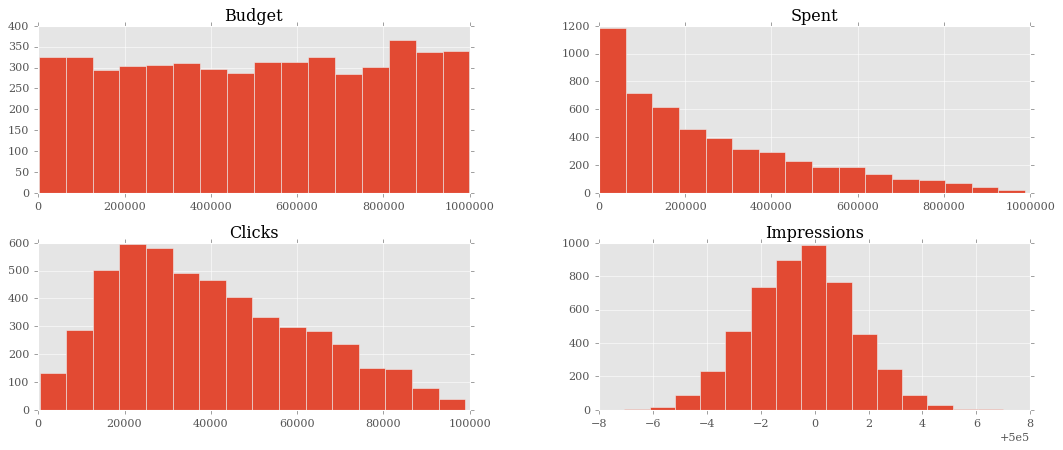

In [26]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=16, figsize=(16, 6));

array([[<Axes: title={'center': 'CTR'}>, <Axes: title={'center': 'CPC'}>],
       [<Axes: title={'center': 'CPI'}>, <Axes: >]], dtype=object)

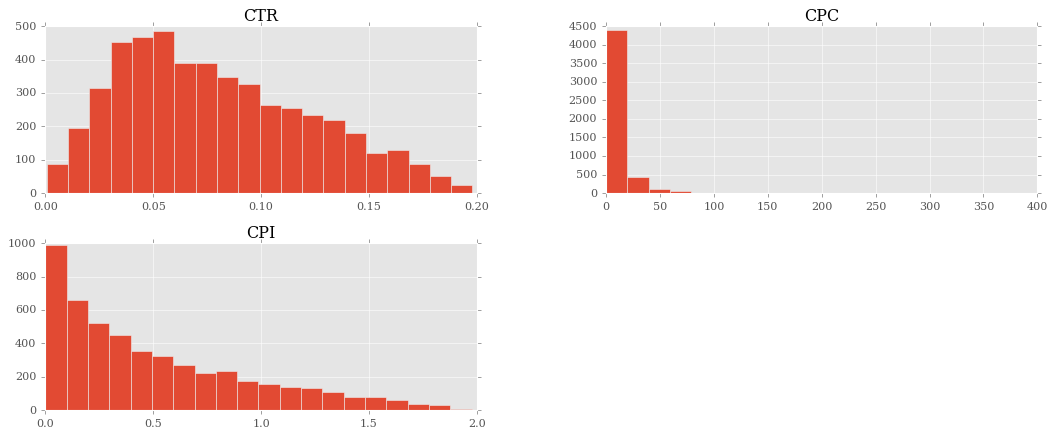

In [27]:
df[['CTR', 'CPC', 'CPI']].hist(
    bins=20, figsize=(16, 6))

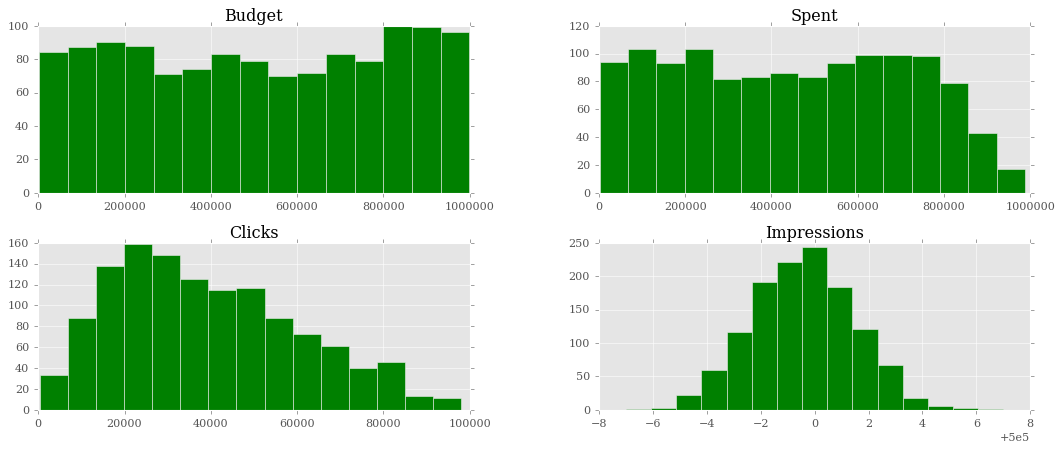

In [28]:
selector = (df.Spent > 0.75 * df.Budget)
df[selector][['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
    bins=15, figsize=(16, 6), color='green');